In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from textblob import TextBlob

In [2]:
Train = pd.read_csv(r'C:\Users\arpan\Downloads\Internship\Prodigy Infotech\PRODIGY_DS_04\Twitter Dataset\twitter_training.csv', names=['ID', 'Company', 'Sentiment', 'Tweet'], header=None)

In [3]:
Train

,ID,Company,Sentiment,Tweet
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
...,...,...,...,...
74677,9200,Nvidia,Positive,Just realized that the Windows partition of my...
74678,9200,Nvidia,Positive,Just realized that my Mac window partition is ...
74679,9200,Nvidia,Positive,Just realized the windows partition of my Mac ...
74680,9200,Nvidia,Positive,Just realized between the windows partition of...


In [4]:
Train.head(15)

,ID,Company,Sentiment,Tweet
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
5,2401,Borderlands,Positive,im getting into borderlands and i can murder y...
6,2402,Borderlands,Positive,So I spent a few hours making something for fu...
7,2402,Borderlands,Positive,So I spent a couple of hours doing something f...
8,2402,Borderlands,Positive,So I spent a few hours doing something for fun...
9,2402,Borderlands,Positive,So I spent a few hours making something for fu...


In [5]:
Train.tail(15)

,ID,Company,Sentiment,Tweet
74667,9198,Nvidia,Negative,Nvidia really delayed the 3070 several weeks.
74668,9198,Nvidia,Negative,Nvidia really only delayed the 3070 2 flight w...
74669,9198,Nvidia,Negative,Nvidia really delayed the next 2 weeks.
74670,9199,Nvidia,Positive,Let no elim go unnoticed. . . . NVIDIA Highlig...
74671,9199,Nvidia,Positive,t let Elim go unnoticed.... NVIDIA Highlights ...
74672,9199,Nvidia,Positive,Let no elite go unnoticed... NVIDIA Highlights...
74673,9199,Nvidia,Positive,Let no elim go unnoticed.... NVIDIA Highlights...
74674,9199,Nvidia,Positive,Let a no information elim that go unnoticed......
74675,9199,Nvidia,Positive,<unk> my elim be no.... NVIDIA Highlights Pict...
74676,9200,Nvidia,Positive,Just realized the windows partition of my Mac ...


In [6]:
Train.columns

Index(['ID', 'Company', 'Sentiment', 'Tweet'], dtype='object')

In [7]:
Train.index

RangeIndex(start=0, stop=74682, step=1)

In [8]:
Train.shape

(74682, 4)

In [9]:
Train.size # total = number of rows * columns

298728

In [10]:
Train.describe()

,ID
count,74682.000000
mean,6432.586165
std,3740.427870
min,1.000000
25%,3195.000000
50%,6422.000000
75%,9601.000000
max,13200.000000


In [11]:
Train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74682 entries, 0 to 74681
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   ID         74682 non-null  int64 
 1   Company    74682 non-null  object
 2   Sentiment  74682 non-null  object
 3   Tweet      73996 non-null  object
dtypes: int64(1), object(3)
memory usage: 2.3+ MB


In [12]:
Train.isnull().sum()

ID             0
Company        0
Sentiment      0
Tweet        686
dtype: int64

In [13]:
Train.dropna(axis=0 , inplace=True)

In [14]:
Train.isnull().sum()

ID           0
Company      0
Sentiment    0
Tweet        0
dtype: int64

In [15]:
Train.duplicated().sum()

2340

In [16]:
Train.drop_duplicates(inplace=True)
Train.duplicated().sum()

0

In [17]:
Train.shape

(71656, 4)

In [18]:
sentiment_counts = Train['Sentiment'].value_counts()
sentiment_counts

Sentiment
Negative      21698
Positive      19713
Neutral       17708
Irrelevant    12537
Name: count, dtype: int64

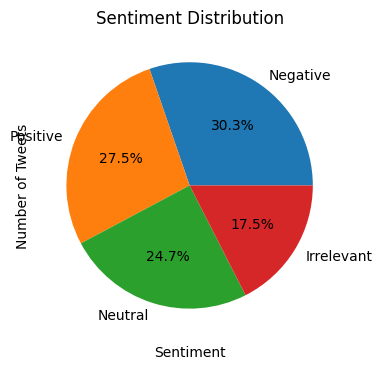

In [40]:
plt.figure(figsize=(8, 4))

# Create the pie plot with percentages
bars = sentiment_counts.plot(kind='pie', autopct='%1.1f%%')

plt.title('Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Number of Tweets')
plt.xticks(rotation=0)
plt.show()

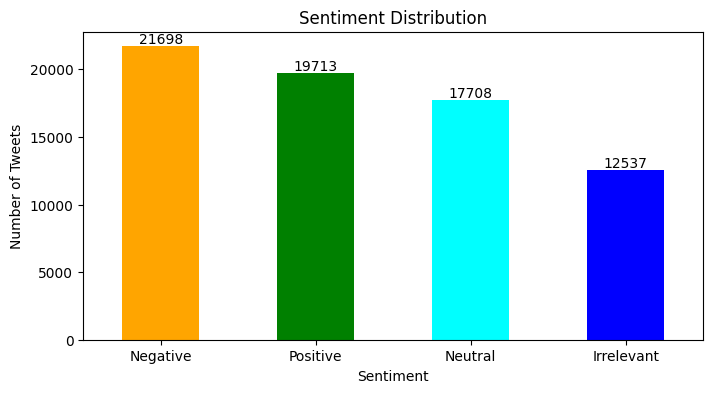

In [19]:
plt.figure(figsize=(8, 4))

# Create the bar plot
bars = sentiment_counts.plot(kind='bar', color=['orange', 'green', 'cyan', 'blue'])

# Add text labels on top of each bar
for bar in bars.patches:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.1, round(yval, 2), ha='center', va='bottom')

plt.title('Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Number of Tweets')
plt.xticks(rotation=0)
plt.show()

In [20]:
Train.Company.unique()

array(['Borderlands', 'CallOfDutyBlackopsColdWar', 'Amazon', 'Overwatch',
       'Xbox(Xseries)', 'NBA2K', 'Dota2', 'PlayStation5(PS5)',
       'WorldOfCraft', 'CS-GO', 'Google', 'AssassinsCreed', 'ApexLegends',
       'LeagueOfLegends', 'Fortnite', 'Microsoft', 'Hearthstone',
       'Battlefield', 'PlayerUnknownsBattlegrounds(PUBG)', 'Verizon',
       'HomeDepot', 'FIFA', 'RedDeadRedemption(RDR)', 'CallOfDuty',
       'TomClancysRainbowSix', 'Facebook', 'GrandTheftAuto(GTA)',
       'MaddenNFL', 'johnson&johnson', 'Cyberpunk2077',
       'TomClancysGhostRecon', 'Nvidia'], dtype=object)

In [21]:
Company_count=Train.Company.value_counts()
Company_count

Company
TomClancysRainbowSix                 2328
Verizon                              2319
MaddenNFL                            2315
CallOfDuty                           2314
Microsoft                            2304
WorldOfCraft                         2300
NBA2K                                2299
LeagueOfLegends                      2296
TomClancysGhostRecon                 2291
Facebook                             2289
ApexLegends                          2278
johnson&johnson                      2257
Battlefield                          2255
Amazon                               2249
CallOfDutyBlackopsColdWar            2242
FIFA                                 2238
Dota2                                2225
Overwatch                            2220
Hearthstone                          2219
HomeDepot                            2216
GrandTheftAuto(GTA)                  2208
Borderlands                          2206
Xbox(Xseries)                        2201
Google                    

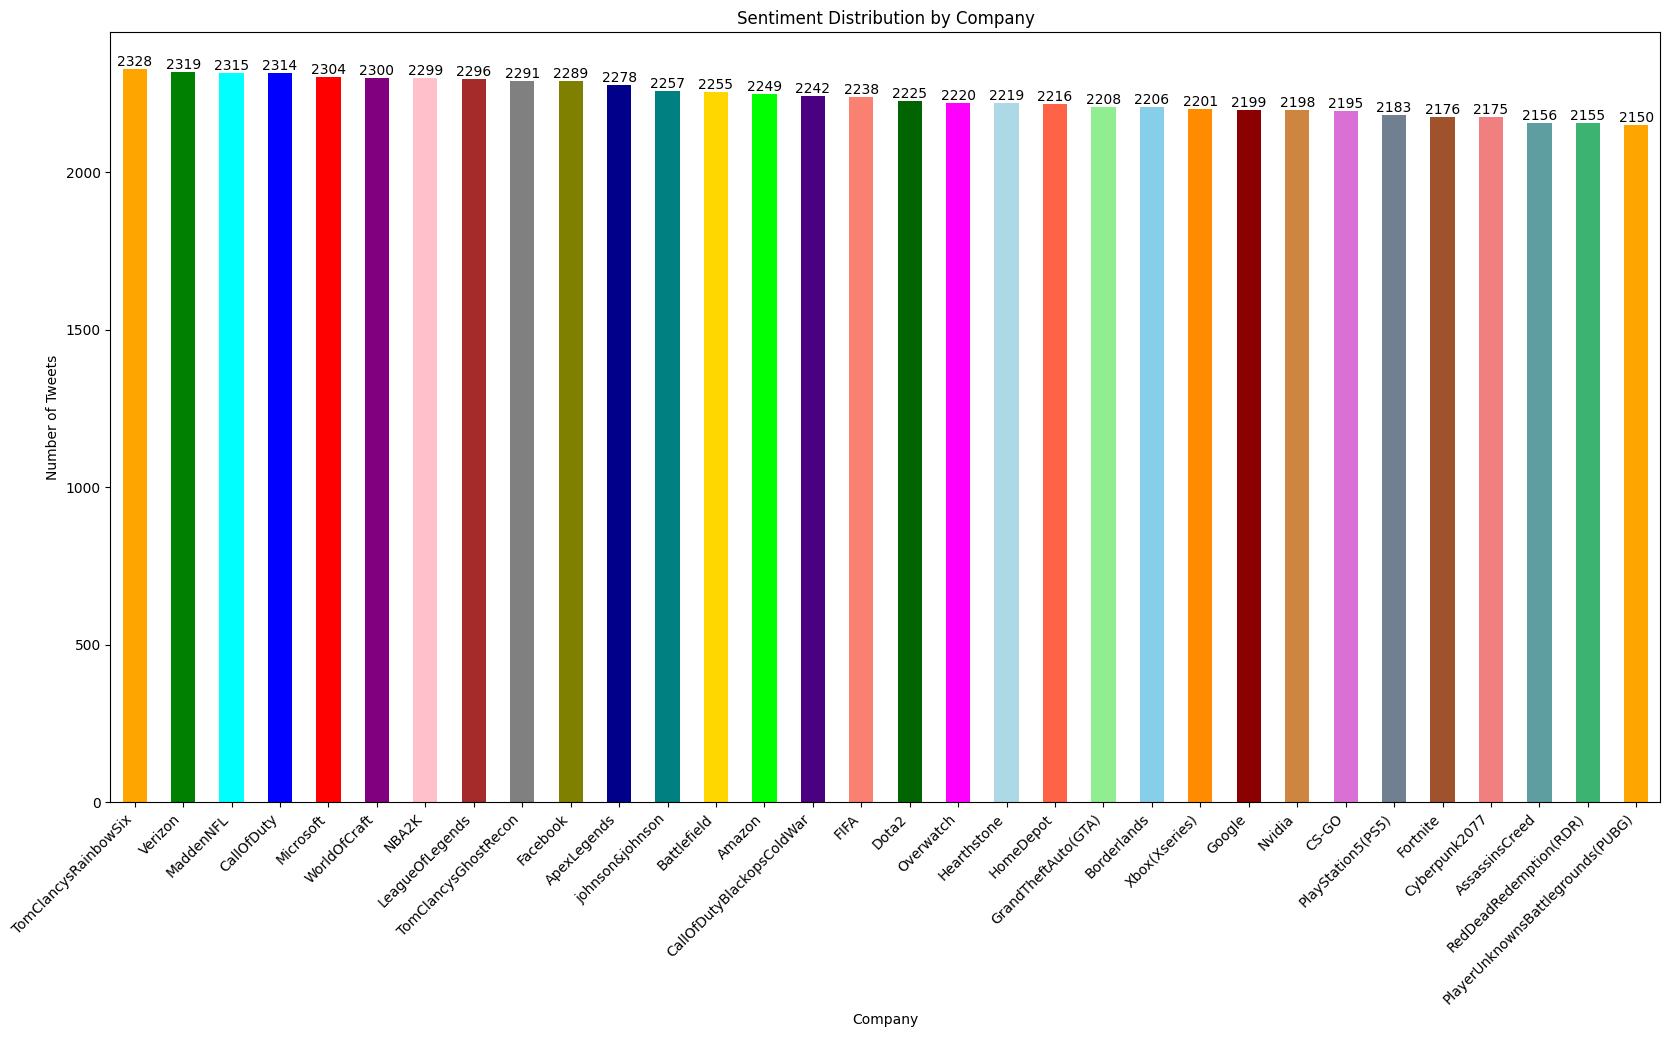

In [22]:
# Custom list of 32 colors
custom_colors = ['orange', 'green', 'cyan', 'blue', 'red', 'purple', 'pink', 'brown', 'gray', 'olive',
                 'darkblue', 'teal', 'gold', 'lime', 'indigo', 'salmon', 'darkgreen', 'magenta', 'lightblue',
                 'tomato', 'lightgreen', 'skyblue', 'darkorange', 'darkred', 'peru', 'orchid', 'slategray',
                 'sienna', 'lightcoral', 'cadetblue', 'mediumseagreen']

plt.figure(figsize=(20, 10))

# Create the bar plot with custom colors
bars = Company_count.plot(kind='bar', color=custom_colors)

# Add text labels on top of each bar
for bar in bars.patches:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval + 0.1, round(yval, 2), ha='center', va='bottom')

plt.title('Sentiment Distribution by Company')
plt.xlabel('Company')
plt.ylabel('Number of Tweets')
plt.xticks(rotation=45, ha='right')
plt.show()

In [23]:
# Define the categories explicitly
categories = ['Positive', 'Negative', 'Neutral', 'Irrelevant']

# Create a cross-tabulation of Sentiment_Label and Company
sentiment_counts_by_company = pd.crosstab(index=Train['Company'], columns=pd.Categorical(Train['Sentiment'], categories=categories))

# Display the result
print(sentiment_counts_by_company)

col_0                              Positive  Negative  Neutral  Irrelevant
Company                                                                   
Amazon                                  302       565     1197         185
ApexLegends                             606       574      913         185
AssassinsCreed                         1382       365      153         256
Battlefield                             561       445      342         907
Borderlands                             972       415      581         238
CS-GO                                   717       335      523         620
CallOfDuty                              426       861      367         660
CallOfDutyBlackopsColdWar               817       540      340         545
Cyberpunk2077                           902       360      456         457
Dota2                                   540       705      579         401
FIFA                                    473      1127      100         538
Facebook                 

In [24]:
# Calculate totals for each sentiment across all companies
total_positive = sentiment_counts_by_company['Positive'].sum()
total_negative = sentiment_counts_by_company['Negative'].sum()
total_neutral = sentiment_counts_by_company['Neutral'].sum()
total_irrelevant = sentiment_counts_by_company['Irrelevant'].sum()

# Display the totals
print("Total Positive:", total_positive)
print("Total Negative:", total_negative)
print("Total Neutral:", total_neutral)
print("Total Irrelevant:", total_irrelevant)


Total Positive: 19713
Total Negative: 21698
Total Neutral: 17708
Total Irrelevant: 12537


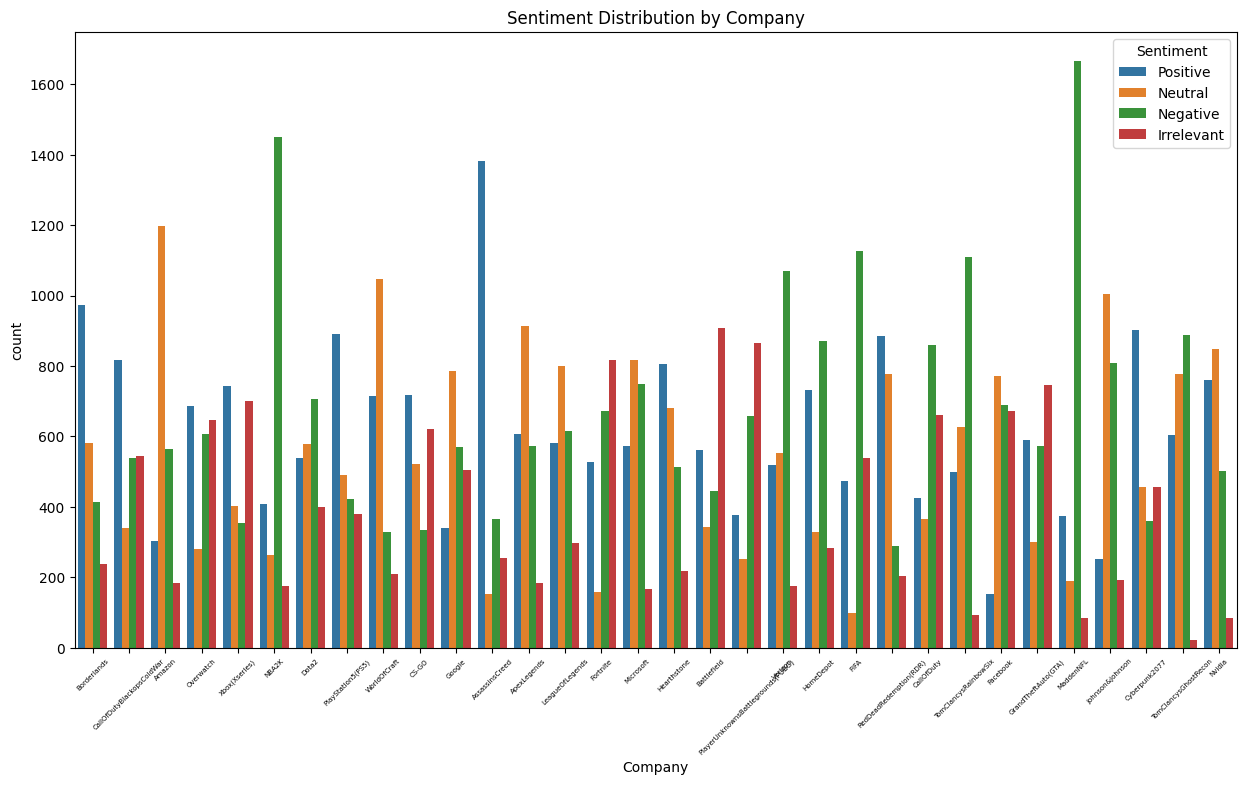

In [25]:
plt.figure(figsize=(15, 8))
sns.countplot(x='Company', hue='Sentiment', data=Train)

plt.title('Sentiment Distribution by Company')
plt.xticks (rotation=45, fontsize=5)

plt.show()

<Figure size 2000x800 with 0 Axes>

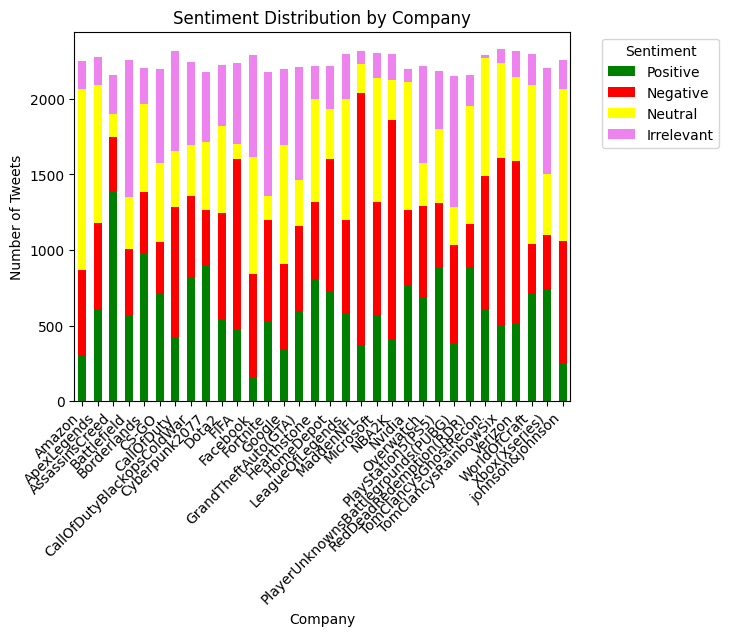

In [26]:
# Define colors for each sentiment
colors = {'Positive': 'green', 'Negative': 'red', 'Neutral': 'yellow', 'Irrelevant': 'violet'}

# Plot the bar chart with custom colors
plt.figure(figsize=(20, 8))
sentiment_counts_by_company.plot(kind='bar', stacked=True, color=[colors[col] for col in sentiment_counts_by_company.columns])

# Add labels and title
plt.title('Sentiment Distribution by Company')
plt.xlabel('Company')
plt.ylabel('Number of Tweets')
plt.xticks(rotation=45, ha='right')

# Display the legend
plt.legend(title='Sentiment', bbox_to_anchor=(1.05, 1), loc='upper left')

# Show the plot
plt.show()

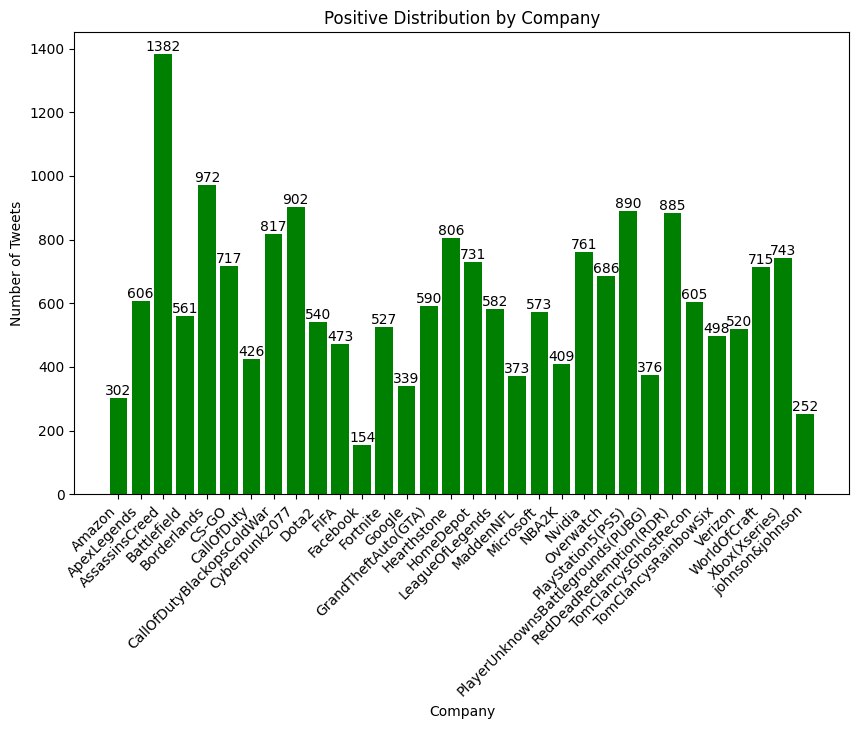

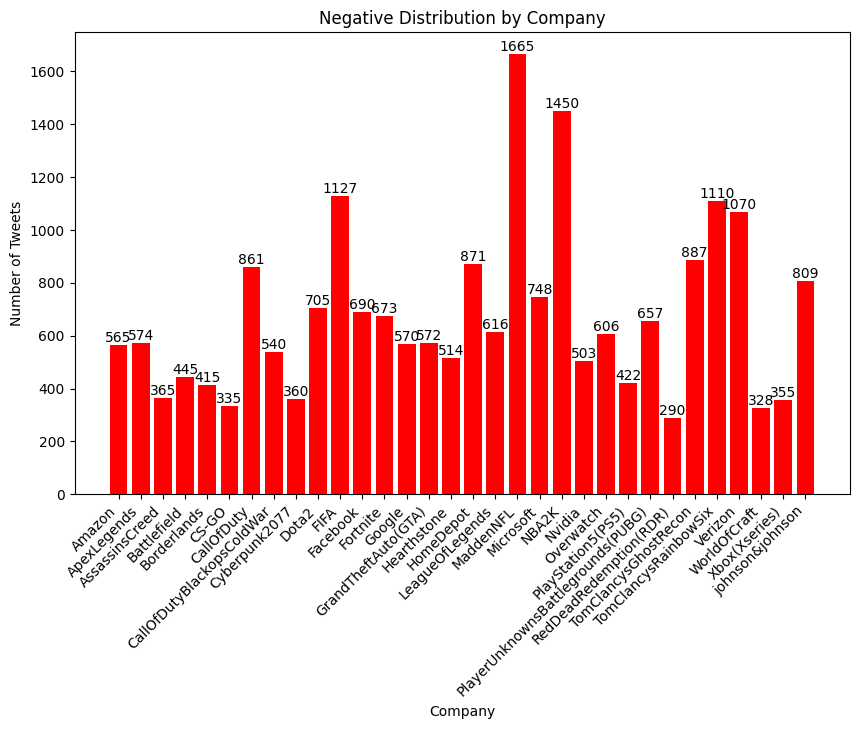

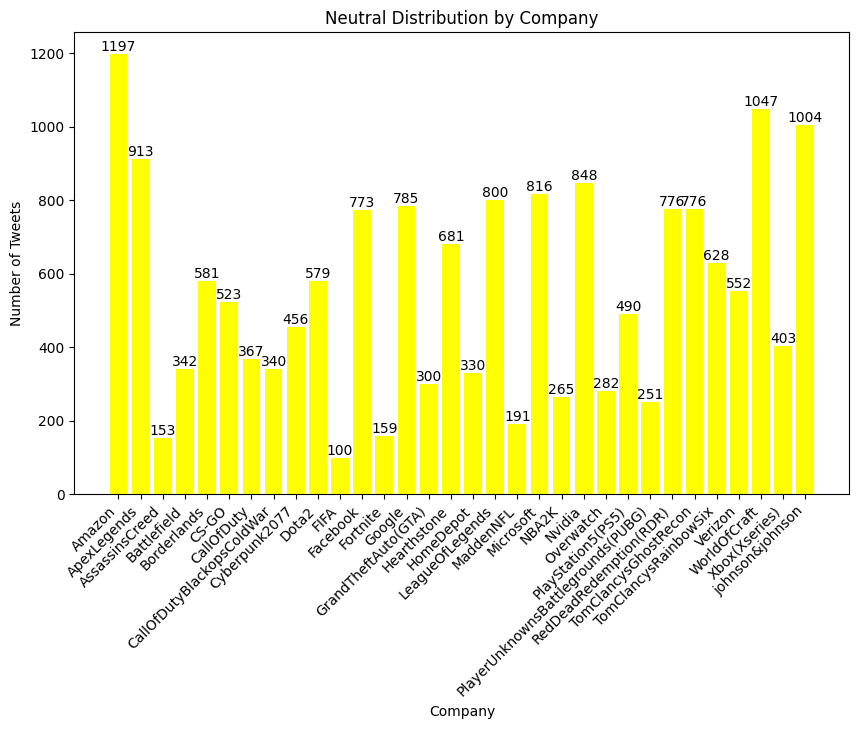

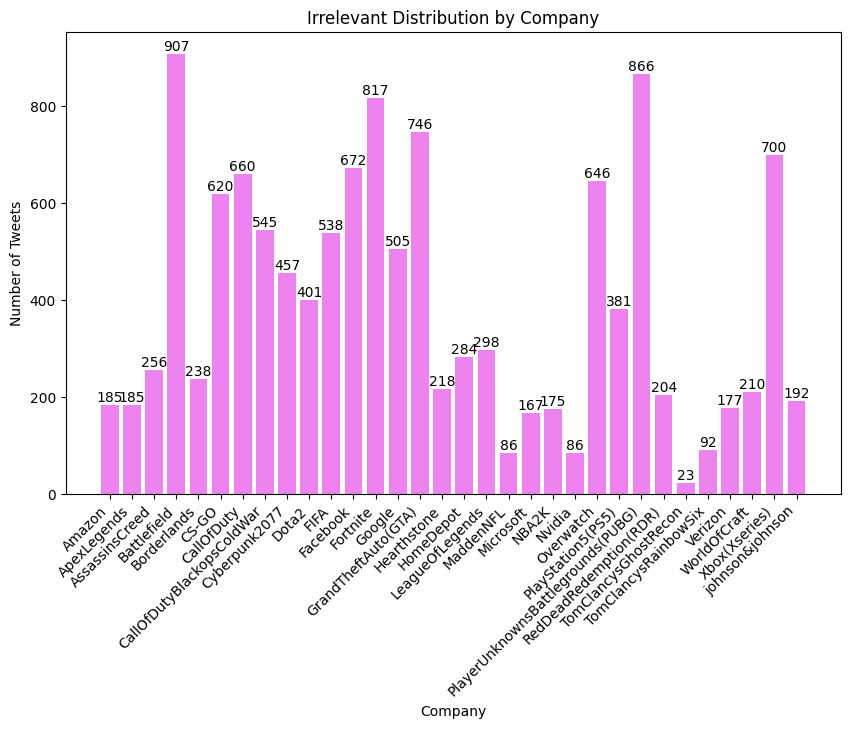

In [27]:
# Define colors for each sentiment
colors = {'Positive': 'green', 'Negative': 'red', 'Neutral': 'yellow', 'Irrelevant': 'violet'}

# Plot individual bar plots for each sentiment
for col, color in colors.items():
    plt.figure(figsize=(10, 6))
    bars = plt.bar(sentiment_counts_by_company.index, sentiment_counts_by_company[col], color=color)
    
    # Add labels and title
    plt.title(f'{col} Distribution by Company')
    plt.xlabel('Company')
    plt.ylabel('Number of Tweets')
    plt.xticks(rotation=45, ha='right')
    
    # Add counts on top of each bar
    for bar in bars:
        yval = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2, yval + 0.1, round(yval, 2), ha='center', va='bottom')

    # Show the plot
    plt.show()

In [28]:
import nltk
import re
import string

stemmer = nltk.SnowballStemmer("english")

# Download nltk stopwords
nltk.download('stopwords')

from nltk.corpus import stopwords
# Define stopwords
stopword = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\arpan\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [29]:

def clean(text):
    """
    This function cleans the text by converting it to lowercase, removing punctuation, removing URLs and HTML tags,
    removing numbers, and removing stopwords.

    Args:
        text: The text to be cleaned.

    Returns:
        A string containing the cleaned text.
    """
    # Lowercase the text
    text = str(text).lower()

    # Remove square brackets content
    text = re.sub('\[.*?\]', '', text)

    # Remove URLs
    text = re.sub('https?://\S+|www\.\S+', '', text)

    # Remove HTML tags
    text = re.sub('<.*?>+', '', text)

    # Remove punctuation
    text = re.sub('[%s]' % re.escape(string.punctuation), "", text)

    # Remove newline characters
    text = re.sub('\n', '', text)

    # Remove words containing numbers
    text = re.sub('\w*\d\w*', '', text)

    # Remove stopwords
    text = [word for word in text.split(' ') if word not in stopword]

    # Join the words back into a string
    text = " ".join(text)

    # Stemming (optional)
    text = [stemmer.stem(word) for word in text.split(' ')]
    text = " ".join(text)

    return text


In [30]:
Train["Tweet"] = Train["Tweet"].apply(clean)

In [31]:
Train.head()

,ID,Company,Sentiment,Tweet
0,2401,Borderlands,Positive,im get borderland murder
1,2401,Borderlands,Positive,come border kill
2,2401,Borderlands,Positive,im get borderland kill
3,2401,Borderlands,Positive,im come borderland murder
4,2401,Borderlands,Positive,im get borderland murder


In [32]:
from wordcloud import WordCloud, STOPWORDS
wc = WordCloud (width=800, height=500,min_font_size=10, background_color='white')

from PIL import Image, ImageDraw, ImageFont


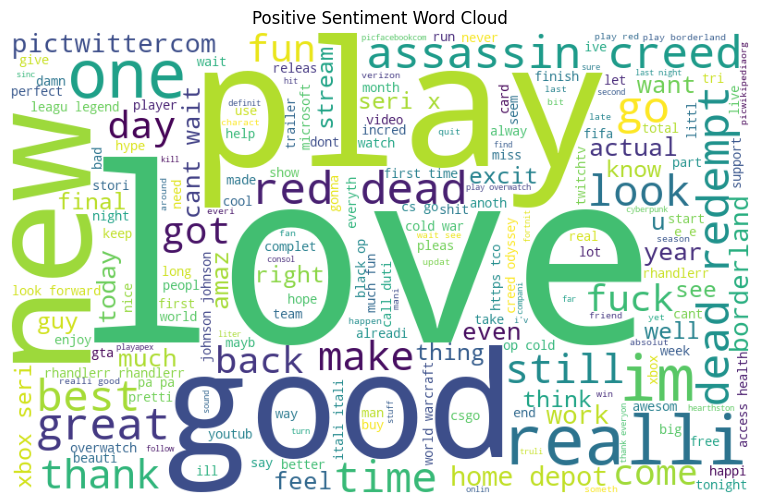

In [33]:
positive_data = Train[Train['Sentiment'] == 'Positive']['Tweet'].str.cat(sep="")

# Exclude the word "game" from the text data
positive_data = positive_data.replace("game", "")

if positive_data:
    wc = WordCloud(width=800, height=500, background_color='white').generate(positive_data)

    plt.figure(figsize=(12, 6))
    plt.title('Positive Sentiment Word Cloud')
    plt.imshow(wc)
    plt.axis("off")
    plt.show()
else:
    print("No data available for positive sentiment.")


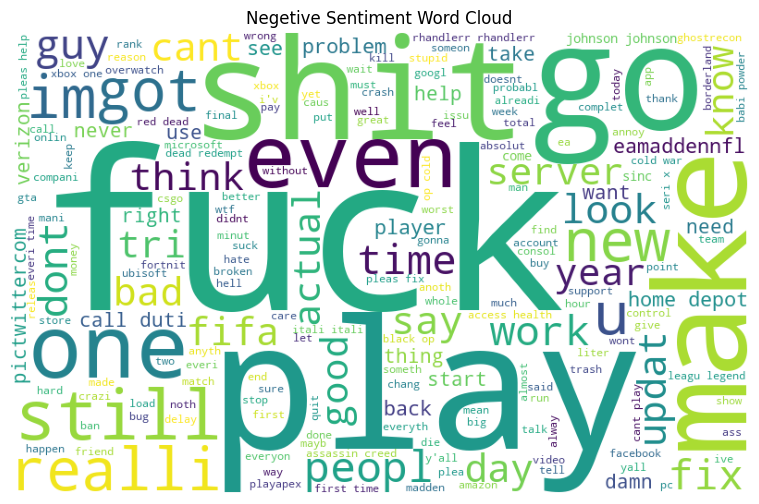

In [34]:
negative_data = Train[Train['Sentiment'] == 'Negative']['Tweet'].str.cat(sep="")

# Exclude the word "game" from the text data
negative_data = negative_data.replace("game", "")

if negative_data:
    wc = WordCloud(width=800, height=500, background_color='white').generate(negative_data)

    plt.figure(figsize=(12, 6))
    plt.title('Negetive Sentiment Word Cloud')
    plt.imshow(wc)
    plt.axis("off")
    plt.show()
else:
    print("No data available for Negetive sentiment.")


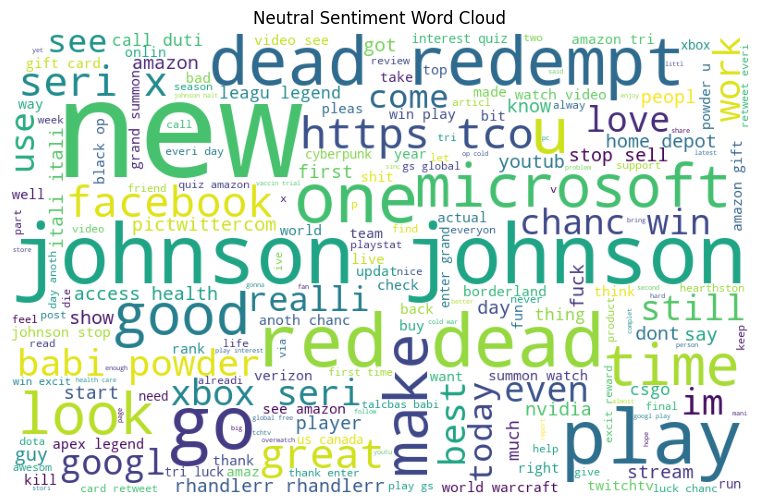

In [35]:
Neutral_data = Train[Train['Sentiment'] == 'Neutral']['Tweet'].str.cat(sep="")

# Exclude the word "game" from the text data
Neutral_data = Neutral_data.replace("game", "")

if Neutral_data:
    wc = WordCloud(width=800, height=500, background_color='white').generate(Neutral_data)

    plt.figure(figsize=(12, 6))
    plt.title('Neutral Sentiment Word Cloud')
    plt.imshow(wc)
    plt.axis("off")
    plt.show()
else:
    print("No data available for Neutral sentiment.")

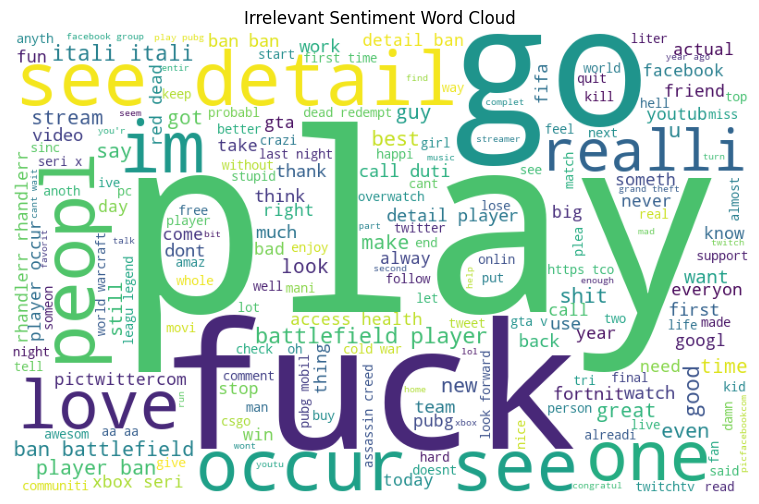

In [36]:
Irrelevant_data = Train[Train['Sentiment'] == 'Irrelevant']['Tweet'].str.cat(sep="")

# Exclude the word "game" from the text data
Irrelevant_data = Irrelevant_data.replace("game", "")

if Irrelevant_data:
    wc = WordCloud(width=800, height=500, background_color='white').generate(Irrelevant_data)

    plt.figure(figsize=(12, 6))
    plt.title('Irrelevant Sentiment Word Cloud')
    plt.imshow(wc)
    plt.axis("off")
    plt.show()
else:
    print("No data available for Irrelevant sentiment.")